In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset=pd.read_csv(r"C:\Users\user\Downloads\Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [5]:
x=dataset.iloc[:,1:2].values

In [6]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

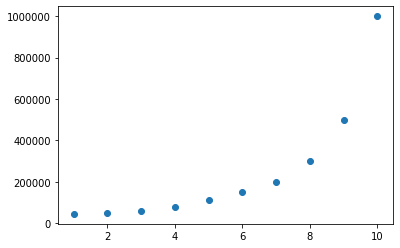

In [8]:
plt.scatter(x,y)

In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
x_poly #y=a0+a1x+a2x^2

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [29]:
x_poly.shape

(10, 5)

In [30]:
from sklearn.linear_model import LinearRegression
pr=LinearRegression()
pr.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
y_pred=pr.predict(x_poly)

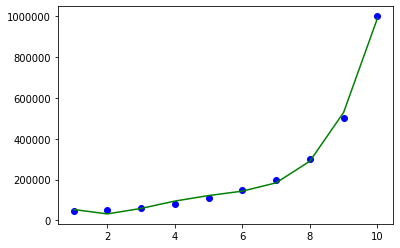

In [32]:
plt.scatter(x,y,color="blue")
plt.plot(x,pr.predict(poly.fit_transform(x)),color="green")

In [33]:
pr.predict(poly.fit_transform([[11]]))

array([1780833.33333322])

In [34]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9973922891706614